## Python statistics essential training - 03_05_morevariables

Standard imports

In [1]:
import numpy as np
import scipy.stats
import pandas as pd

In [2]:
import matplotlib
import matplotlib.pyplot as pp

import pandas.plotting

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [3]:
import re
import mailbox
import csv

In [4]:
gapminder = pd.read_csv('gapminder.csv')

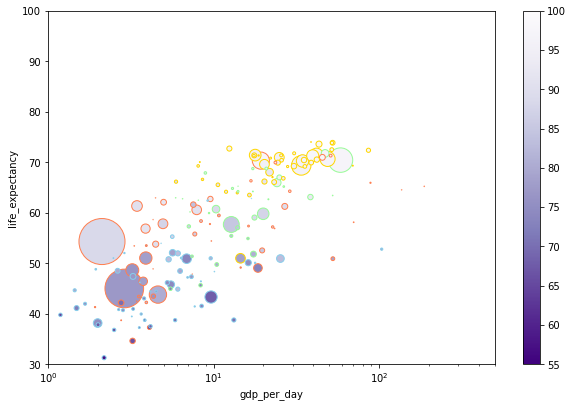

In [24]:
def plotyear(year):
    data = gapminder[gapminder.year == year].sort_values('population', ascending=False)
    area = data.population * 3e-6
    color = data.age5_surviving
    edgecolor = data.region.map({'Africa': 'skyblue', 'Europe': 'gold', 'America': 'palegreen', 'Asia': 'coral'})
    
    data.plot.scatter('gdp_per_day', 'life_expectancy', logx=True,
                      s=area, c=color,
                      colormap=matplotlib.cm.get_cmap('Purples_r'), vmin=55, vmax=100,
                      linewidth=1, edgecolors=edgecolor, sharex=False,
                      figsize=(10, 6.5))
    pp.axis(xmin=1, xmax=500, ymin=30, ymax=100)
plotyear(1965)    
    

In [25]:
interact(plotyear, year=range(1965, 2016, 10))

interactive(children=(Dropdown(description='year', options=(1965, 1975, 1985, 1995, 2005, 2015), value=1965), …

<function __main__.plotyear(year)>

In [26]:
gapminder[gapminder.year == 2015].population.sum()

7292414176.0

In [31]:
gapminder[(gapminder.year == 2015) & (gapminder.region == 'Asia')].population.sum()

4299141788.0

In [33]:
(gapminder[(gapminder.year == 2015) & (gapminder.region == 'Asia')].population.sum())/(gapminder[gapminder.year == 2015].population.sum())

0.5895361514364978

In [34]:
gapminder[gapminder.year == 2015].groupby('region').population.sum()

region
Africa     1.172161e+09
America    9.865771e+08
Asia       4.299142e+09
Europe     8.345345e+08
Name: population, dtype: float64

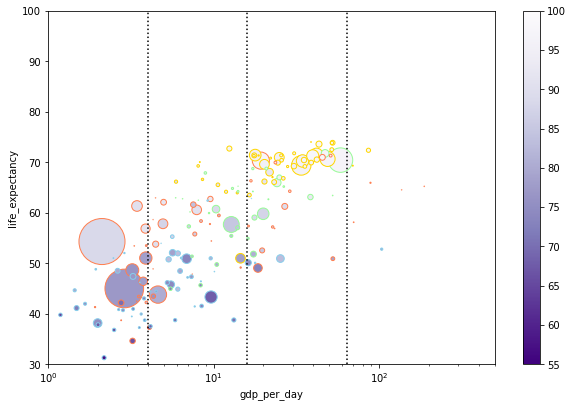

In [35]:
def plotyear(year):
    data = gapminder[gapminder.year == year].sort_values('population', ascending=False)
    area = data.population * 3e-6
    color = data.age5_surviving
    edgecolor = data.region.map({'Africa': 'skyblue', 'Europe': 'gold', 'America': 'palegreen', 'Asia': 'coral'})
    
    data.plot.scatter('gdp_per_day', 'life_expectancy', logx=True,
                      s=area, c=color,
                      colormap=matplotlib.cm.get_cmap('Purples_r'), vmin=55, vmax=100,
                      linewidth=1, edgecolors=edgecolor, sharex=False,
                      figsize=(10, 6.5))
    for level in [4, 16, 64]:
        pp.axvline(level, linestyle=':', c='k')
    pp.axis(xmin=1, xmax=500, ymin=30, ymax=100)
plotyear(1965)    
    

In [36]:
interact(plotyear, year=range(1965, 2016, 10))

interactive(children=(Dropdown(description='year', options=(1965, 1975, 1985, 1995, 2005, 2015), value=1965), …

<function __main__.plotyear(year)>

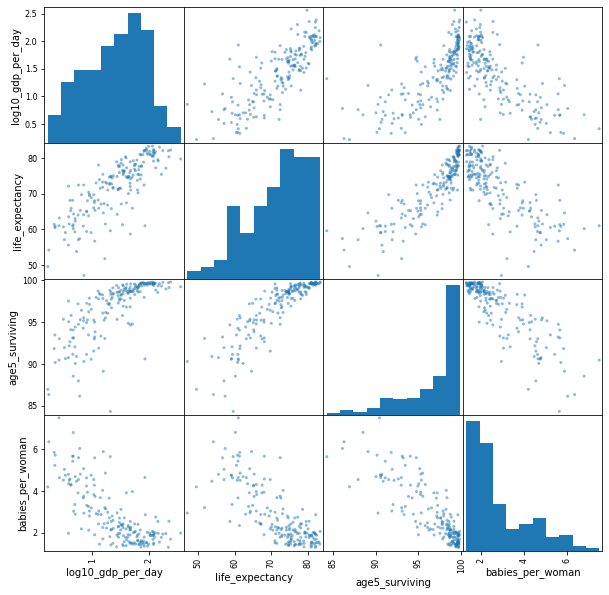

In [41]:
gapminder['log10_gdp_per_day'] = np.log10(data.gdp_per_day)
data = gapminder.loc[gapminder.year == 2015, ['log10_gdp_per_day', 'life_expectancy', 'age5_surviving', 'babies_per_woman']]
_ = pd.plotting.scatter_matrix(data, figsize=(10,10))